In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load dataset from Kaggle
#data_url = "https://www.kaggle.com/datasets/shreyasvedpathak/pcos-dataset"
df1 = pd.read_csv('PCOS_data.csv')
df=df1.copy()
# Display the first few rows of the dataset
print(df.head())


   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.3           15                78                22  ...   
1  24.9           15                74                20  ...   
2  25.3           11                72                18  ...   
3  29.7           13                72                20  ...   
4  20.1           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110  

In [2]:
print(df.columns)

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')


In [3]:
# List of necessary columns for PCOS prediction
necessary_columns = [
    ' Age (yrs)',
    # 'Weight (Kg)',
    # 'Height(Cm) ',
    'BMI',
    'Hip(inch)',
    'Waist(inch)',
    'Waist:Hip Ratio',
    'Cycle(R/I)',
    'Marraige Status (Yrs)',
    'hair growth(Y/N)',
    'Skin darkening (Y/N)', 
    'Hair loss(Y/N)',
    'Pimples(Y/N)',
    # 'AMH(ng/mL)',
    # 'FSH(mIU/mL)',
    # 'LH(mIU/mL)',
    # 'II    beta-HCG(mIU/mL)',
    'Fast food (Y/N)',
    'PCOS (Y/N)'  # Target variable
]

# Drop all columns except the necessary ones
df_filter=df[necessary_columns]

# Display the resulting DataFrame
print(df_filter.head())
print(df_filter.shape)


    Age (yrs)   BMI  Hip(inch)  Waist(inch)  Waist:Hip Ratio  Cycle(R/I)  \
0          28  19.3         36           30             0.83           2   
1          36  24.9         38           32             0.84           2   
2          33  25.3         40           36             0.90           2   
3          37  29.7         42           36             0.86           2   
4          25  20.1         37           30             0.81           2   

   Marraige Status (Yrs)  hair growth(Y/N)  Skin darkening (Y/N)  \
0                    7.0                 0                     0   
1                   11.0                 0                     0   
2                   10.0                 0                     0   
3                    4.0                 0                     0   
4                    1.0                 0                     0   

   Hair loss(Y/N)  Pimples(Y/N)  Fast food (Y/N)  PCOS (Y/N)  
0               0             0              1.0           0  
1       

In [4]:
df_filter['Marraige Status (Yrs)'].dropna
df_filter['Fast food (Y/N)'].dropna
df_filter=df_filter.dropna()

<Axes: >

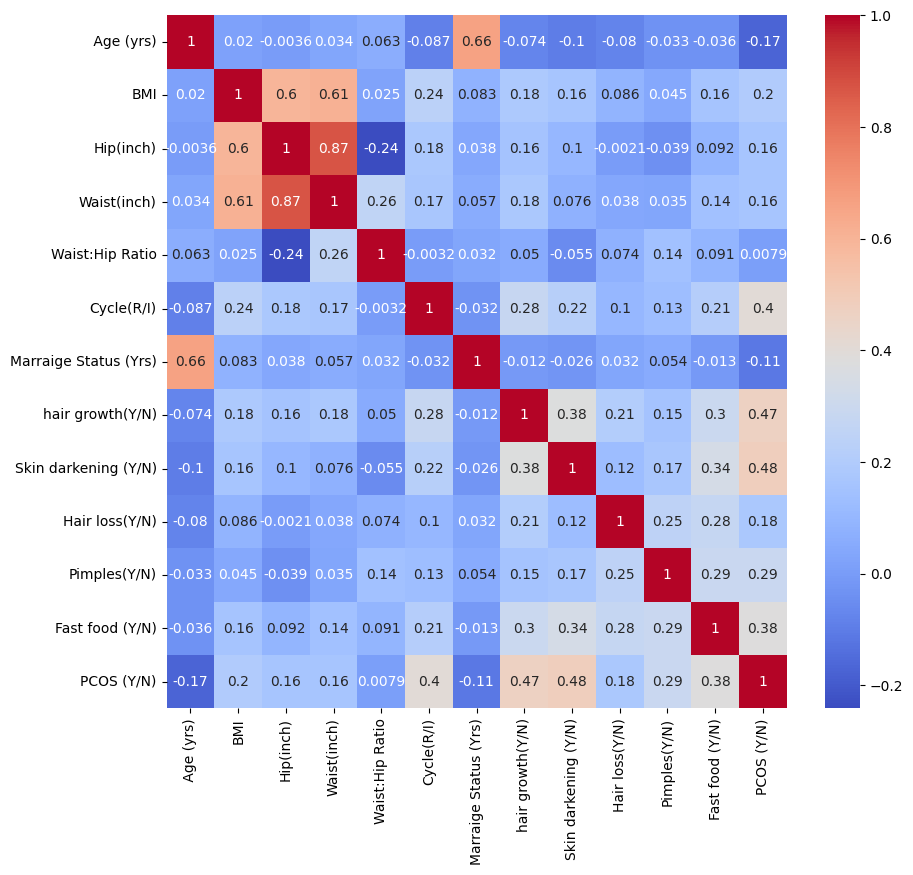

In [5]:
plt.figure(figsize=(10,9))
sns.heatmap(cmap='coolwarm',data=df_filter.corr(),annot=True)

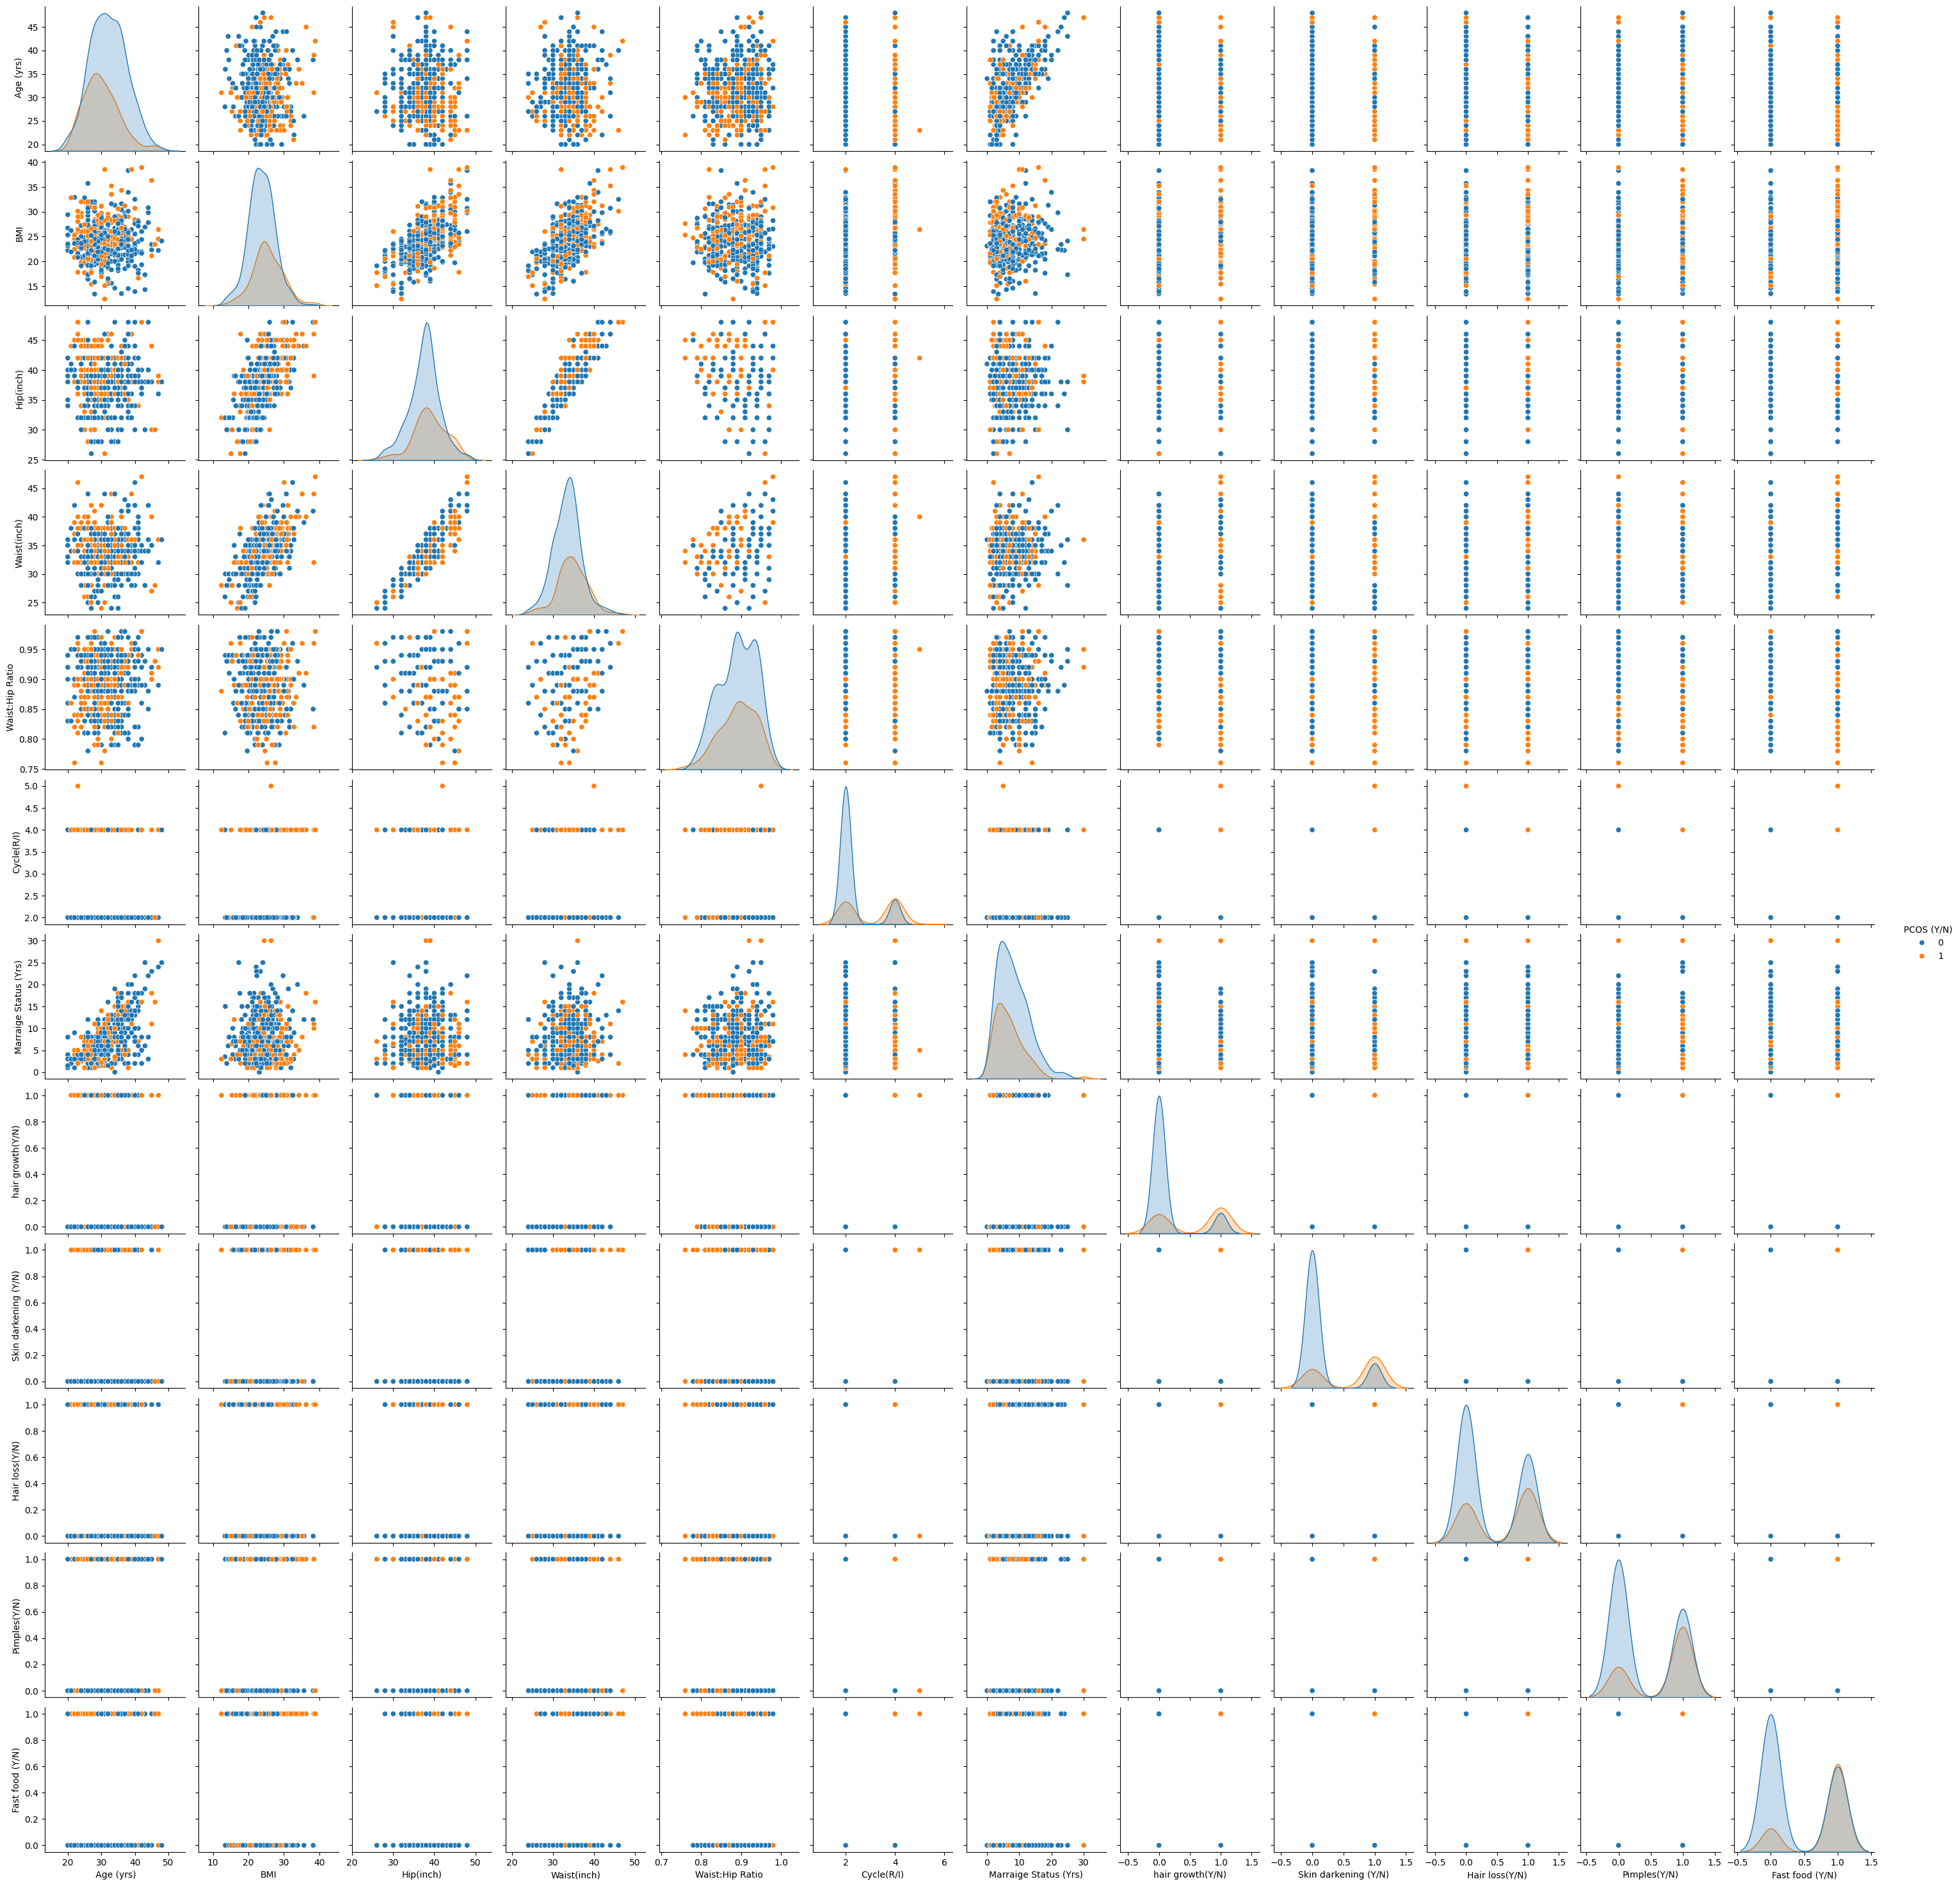

In [6]:
sns.pairplot(df_filter, hue='PCOS (Y/N)')
plt.show()

In [7]:
# Find correlation of features with the target variable (PCOS (Y/N))
correlation = df_filter.corr()
correlation_target = correlation['PCOS (Y/N)'].sort_values(ascending=False)

# Display the correlation of each feature with the target
print(correlation_target)


PCOS (Y/N)               1.000000
Skin darkening (Y/N)     0.481768
hair growth(Y/N)         0.466930
Cycle(R/I)               0.402312
Fast food (Y/N)          0.381772
Pimples(Y/N)             0.288609
BMI                      0.198800
Hair loss(Y/N)           0.177458
Waist(inch)              0.162143
Hip(inch)                0.161700
Waist:Hip Ratio          0.007936
Marraige Status (Yrs)   -0.113701
 Age (yrs)              -0.172436
Name: PCOS (Y/N), dtype: float64


In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the model
log_reg = LogisticRegression()

# Define RFE
rfe = RFE(log_reg, n_features_to_select=10)

# Fit RFE
X =df_filter.drop(columns=['PCOS (Y/N)'])
y = df_filter['PCOS (Y/N)']
rfe = rfe.fit(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features: ", selected_features)


Selected Features:  Index([' Age (yrs)', 'BMI', 'Waist:Hip Ratio', 'Cycle(R/I)',
       'Marraige Status (Yrs)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)'],
      dtype='object')


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [9]:
# Binning a continuous feature like 'Age'
df_filter['Age_bin'] = pd.cut(df_filter[' Age (yrs)'], bins=[20, 30, 40, 50], labels=['20-30', '30-40', '40-50'])

# One-hot encoding for the binned feature
df_filter = pd.get_dummies(df_filter, columns=['Age_bin'], drop_first=True)


In [10]:
# Interaction between BMI and Age
df_filter['BMI_Age_interaction'] = df_filter['BMI'] * df[' Age (yrs)']


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['BMI',' Age (yrs)' ]] = scaler.fit_transform(df[['BMI',' Age (yrs)']])


# Get feature importance (coefficients)
importance = log_reg.coef_[0]
for i, v in enumerate(importance):
    print(f'Feature: {selected_features[i]}, Score: {v}')



AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and test sets
X = df_filter[selected_features]
y = df_filter['PCOS (Y/N)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy:  0.8703703703703703
Confusion Matrix:
 [[77  3]
 [11 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        80
           1       0.85      0.61      0.71        28

    accuracy                           0.87       108
   macro avg       0.86      0.78      0.81       108
weighted avg       0.87      0.87      0.86       108



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
import joblib
joblib.dump(log_reg, 'pcos_model.pkl')

['pcos_model.pkl']